IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

IMPORT DATA

In [16]:
detail = pd.read_csv("../description.csv")
detail

,Variable,Description
0,AccountID,account unique identifier
1,Churn,account churn flag
2,Tenure,Tenure of account
3,City_Tier,Tier of primary customer's city
4,CC_Contacted_L12m,How many times all the customers of the account has contacted customer care in last 12months
5,Payment,Preferred Payment mode of the customers in the account
6,Gender,Gender of the primary customer of the account
7,Service_Score,Satisfaction score given by customers of the account on service provided by company
8,Account_user_count,Number of customers tagged with this account
9,account_segment,Account segmentation on the basis of spend


In [17]:
df = pd.read_csv("../train.csv")
df.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,0,3,1.0,27.0,Credit Card,Male,3.0,4,Regular Plus,1.0,Married,3,0.0,14,2,11,163.12,Computer
1,0,10,1.0,14.0,Debit Card,Female,3.0,4,Super,4.0,Single,15,1.0,12,5,13,181.10,Mobile
2,0,31,1.0,11.0,Debit Card,Male,3.0,6,Super,3.0,Married,6,1.0,14,2,3,186.60,Computer
3,0,1,1.0,16.0,Credit Card,Male,4.0,5,Regular Plus,3.0,Single,3,0.0,20,2,1,160.30,Mobile
4,0,26,1.0,35.0,Credit Card,Female,3.0,2,Super Plus,3.0,Divorced,4,1.0,12,1,3,257.47,Computer


In [18]:
df.shape

(1600, 18)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    1600 non-null   int64  
 1   Tenure                   1600 non-null   int64  
 2   City_Tier                1600 non-null   float64
 3   CC_Contacted_LY          1600 non-null   float64
 4   Payment                  1600 non-null   object 
 5   Gender                   1600 non-null   object 
 6   Service_Score            1600 non-null   float64
 7   Account_user_count       1600 non-null   int64  
 8   account_segment          1600 non-null   object 
 9   CC_Agent_Score           1600 non-null   float64
 10  Marital_Status           1600 non-null   object 
 11  rev_per_month            1600 non-null   int64  
 12  Complain_ly              1600 non-null   float64
 13  rev_growth_yoy           1600 non-null   int64  
 14  coupon_used_for_payment 

In [20]:
df.isnull().sum()

Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

In [21]:
df.describe()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,0.166875,11.398125,1.645625,17.653125,2.908750,3.667500,3.049375,6.901875,0.278125,16.260000,1.811875,4.749375,178.964681
std,0.372981,13.915123,0.910666,8.444369,0.735365,1.041692,1.384064,14.408834,0.448215,3.854924,2.039076,3.580443,49.561102
min,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,0.000000,4.000000
25%,0.000000,2.000000,1.000000,11.000000,2.000000,3.000000,2.000000,3.000000,0.000000,13.000000,1.000000,2.000000,147.057500
50%,0.000000,8.000000,1.000000,16.000000,3.000000,4.000000,3.000000,5.000000,0.000000,15.000000,1.000000,4.000000,164.805000
75%,0.000000,16.000000,3.000000,23.000000,3.000000,4.000000,4.000000,7.000000,1.000000,19.000000,2.000000,8.000000,199.240000
max,1.000000,99.000000,3.000000,43.000000,4.000000,6.000000,5.000000,140.000000,1.000000,28.000000,14.000000,18.000000,329.260000


In [25]:
def unique_value(df):
    print("-----------Unique values in dataframe-----------")
    features = df.columns
    for feature in features:
        values = df[feature].unique().reshape(-1)
        print(feature + ":", end=" ")
        for i in range(len(values) - 1):
            print(values[i], end="; ")
        print(values[-1])
        print()

In [26]:
unique_value(df)

-----------Unique values in dataframe-----------
Churn: 0; 1

Tenure: 3; 10; 31; 1; 26; 29; 8; 0; 4; 6; 23; 7; 20; 5; 9; 22; 99; 14; 28; 27; 21; 12; 11; 16; 13; 25; 19; 2; 30; 18; 17; 15; 24; 60

City_Tier: 1.0; 2.0; 3.0

CC_Contacted_LY: 27.0; 14.0; 11.0; 16.0; 35.0; 13.0; 6.0; 7.0; 28.0; 29.0; 15.0; 25.0; 10.0; 23.0; 21.0; 32.0; 9.0; 20.0; 40.0; 19.0; 30.0; 22.0; 8.0; 34.0; 24.0; 18.0; 42.0; 12.0; 17.0; 37.0; 36.0; 31.0; 38.0; 33.0; 26.0; 41.0; 39.0; 43.0; 5.0

Payment: Credit Card; Debit Card; Cash on Delivery; UPI; E wallet

Gender: Male; Female

Service_Score: 3.0; 4.0; 2.0; 1.0; 0.0

Account_user_count: 4; 6; 5; 2; 3; 1

account_segment: Regular Plus; Super; Super Plus; HNI; Regular

CC_Agent_Score: 1.0; 4.0; 3.0; 5.0; 2.0

Marital_Status: Married; Single; Divorced

rev_per_month: 3; 15; 6; 4; 2; 10; 5; 1; 133; 7; 8; 9; 101; 11; 13; 12; 115; 14; 113; 124; 117; 108; 114; 119; 103; 129; 100; 135; 140; 111; 123; 136; 130

Complain_ly: 0.0; 1.0

rev_growth_yoy: 14; 12; 20; 15; 19; 11

EDA

In [27]:
customers = df.copy()

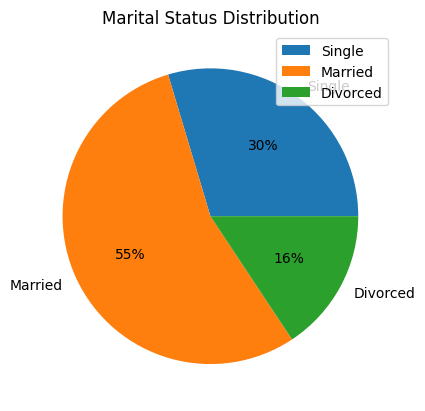

In [31]:
single_count = customers[customers["Marital_Status"] == 'Single']['Marital_Status'].count()
married_count = customers[customers["Marital_Status"] == 'Married']['Marital_Status'].count()
divorced_count = customers[customers["Marital_Status"] == 'Divorced']['Marital_Status'].count()

# Tạo danh sách số lượng thuộc tính cho biểu đồ tròn
labels = ['Single', 'Married', 'Divorced']
sizes = [single_count, married_count, divorced_count]

# Tạo biểu đồ tròn
plt.pie(sizes, labels=labels, autopct='%1.0f%%')
plt.title('Marital Status Distribution')
plt.legend()
plt.show()

In [32]:
print("Single", single_count)
print("Married", married_count)
print("Divorced", divorced_count)

Single 474
Married 875
Divorced 251


In [33]:
nan_rows = customers[customers.isna().all(axis=1)]
nan_rows.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device


CAT_COLS

In [34]:
customers['City_Tier'] = customers['City_Tier'].replace([1.0, 2.0, 3.0], ['tier_1', 'tier_2', 'tier_3'])

In [36]:
cat_cols = ['Payment', 'City_Tier', 'Gender', 'account_segment', 'Login_device']
num_cols = ['Churn', 'Tenure', 'CC_Contacted_LY', 'Service_Score', 'Account_user_count','CC_Agent_Score', 'rev_per_month', 'Complain_ly', 'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect','cashback']

In [37]:
def _bar_plot(df, feature):
    pd.DataFrame(df[feature].value_counts()).plot(kind='bar', figsize=(30, 3))

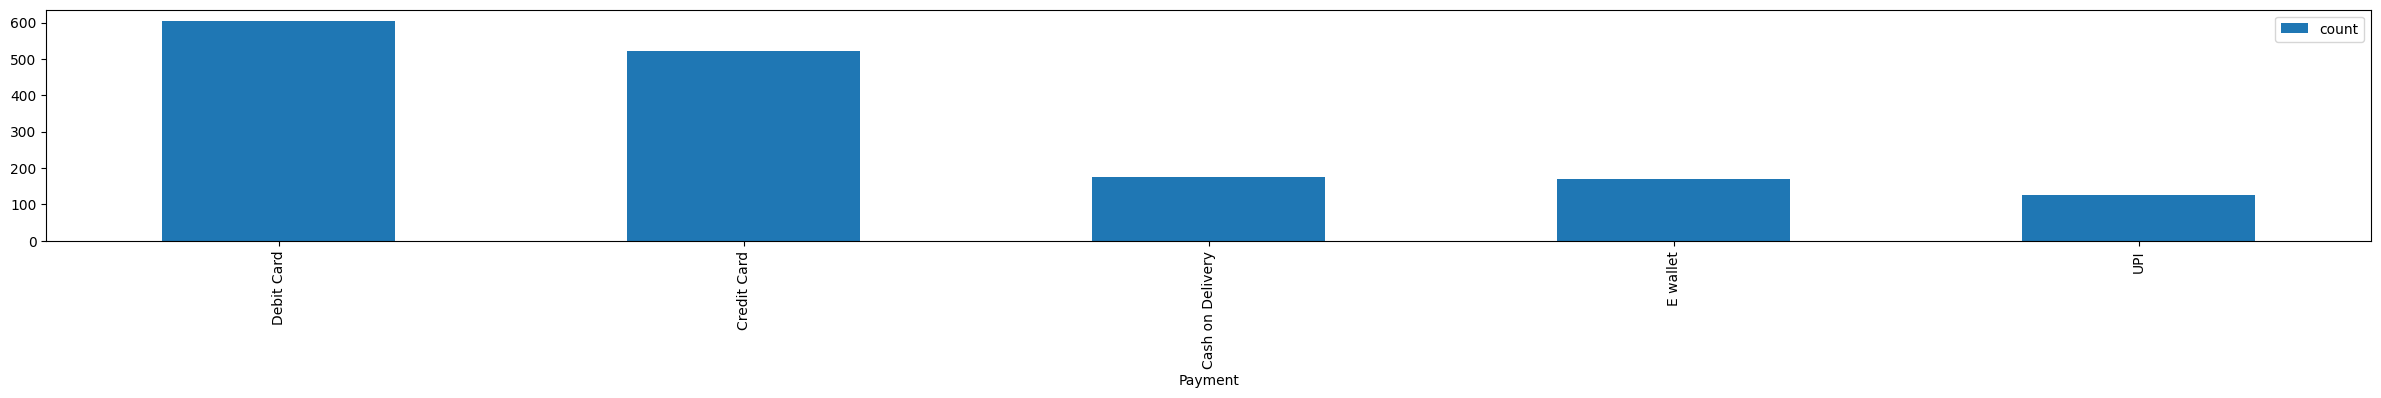

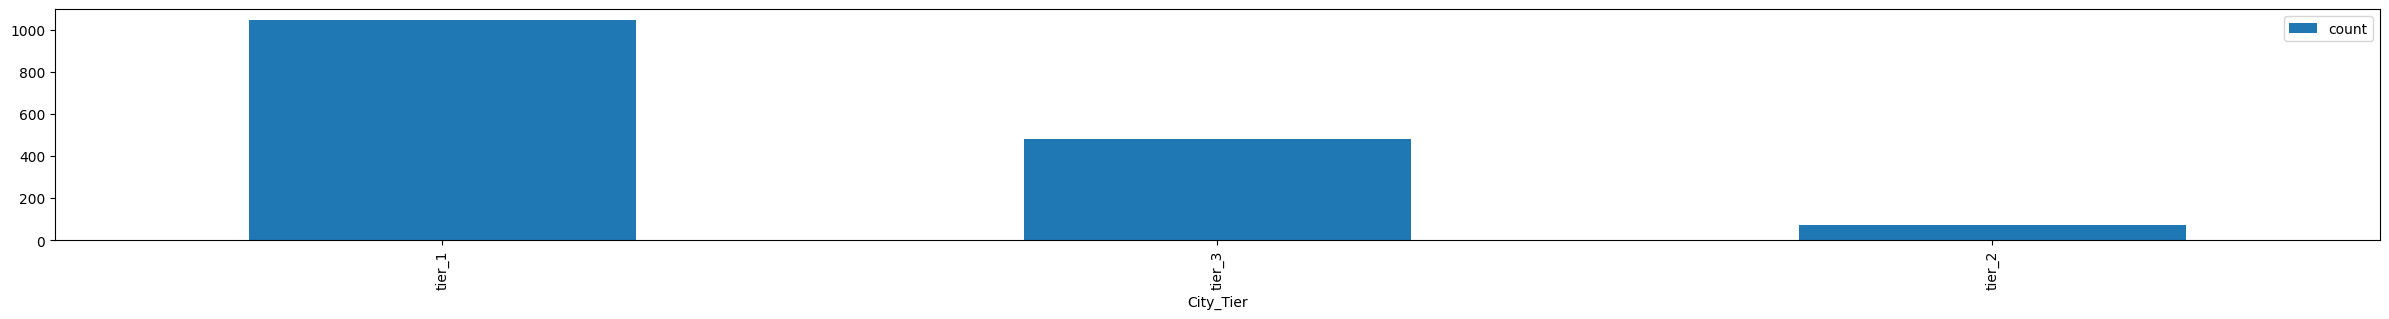

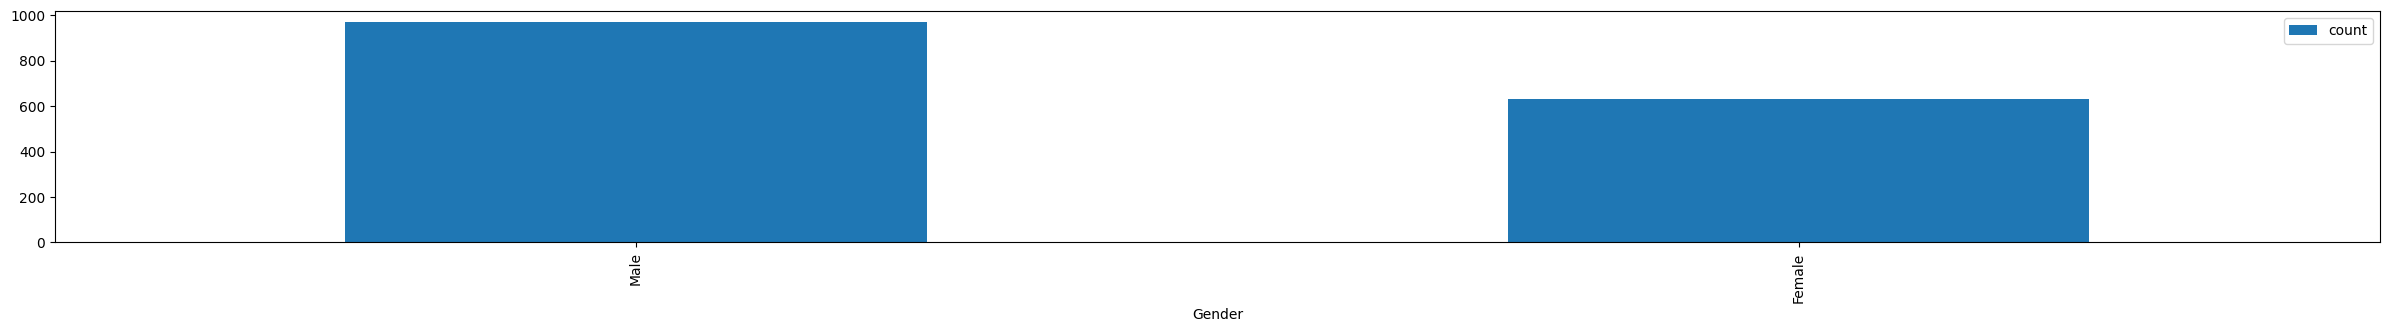

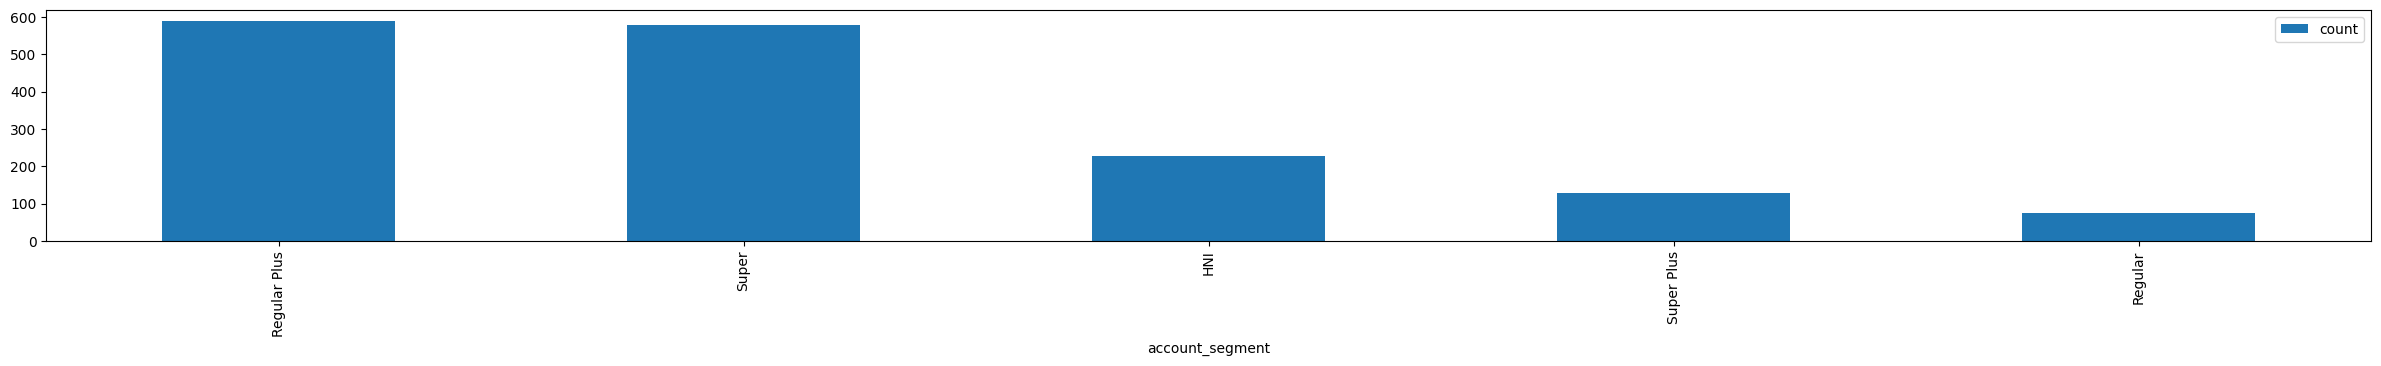

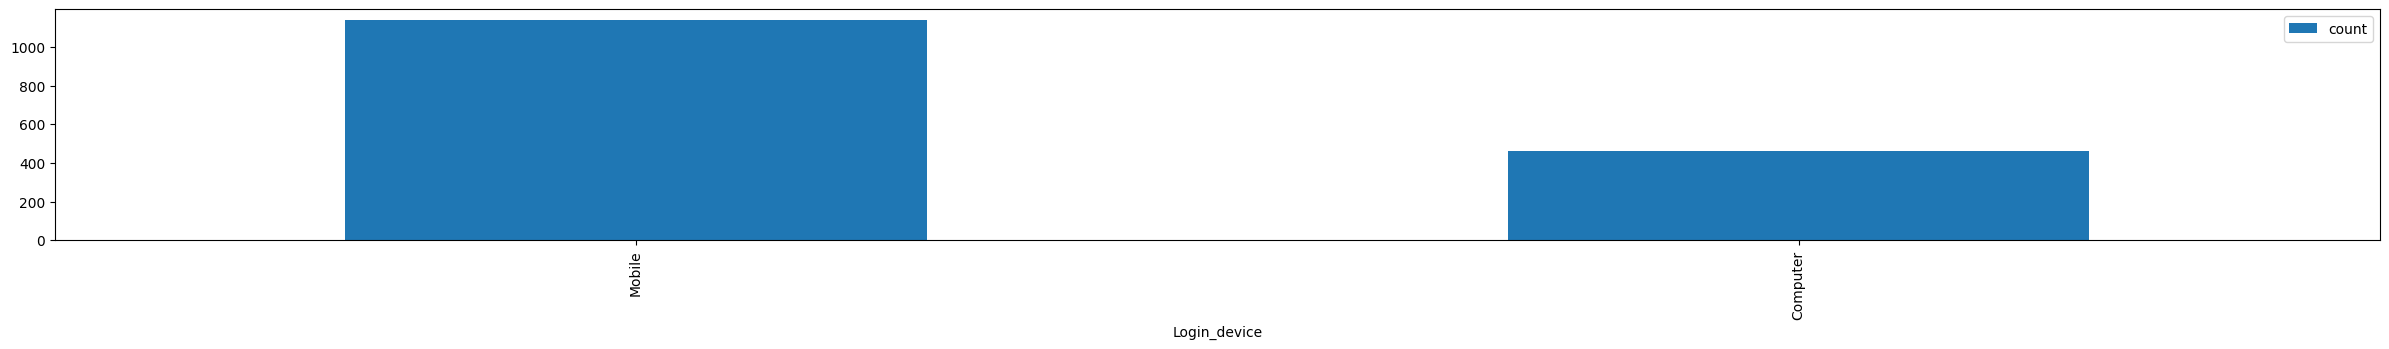

In [38]:
for col in cat_cols:
    _bar_plot(customers, col)

In [41]:
def chisquared_test(df: pd.DataFrame, col1: str, col2: str, alpha: float, display: int) -> None:
  from scipy import stats

  cross_table = pd.crosstab(df[col1], df[col2])
  observed_values = cross_table.values

  val = stats.chi2_contingency(cross_table)

  chi2 = val[0]
  ddof = val[2]
  expected_values = val[3]
  critical_value = stats.chi2.ppf(q=alpha, df = ddof)
  if display != 0:
    print('Chi-square statistic: ', chi2)
    print('Degree of freedom: ', ddof)
    print('Significant  level: ', 1 - alpha)
    print('Critical value: ', critical_value )

  if chi2 >= critical_value:
    print('Reject H0, there is a relationship between',col1,'and',col2)
  else: 
    print('Retain H0, there is no relationship between',col1,'and',col2)
  print("------------------")

In [42]:
cat_cols

['Payment', 'City_Tier', 'Gender', 'account_segment', 'Login_device']

In [44]:
for col in cat_cols:
    chisquared_test(customers, 'Marital_Status', col, 0.95, 1)

Chi-square statistic:  6.22103448357892
Degree of freedom:  8
Significant  level:  0.050000000000000044
Critical value:  15.507313055865453
Retain H0, there is no relationship between Marital_Status and Payment
------------------
Chi-square statistic:  10.782274762844757
Degree of freedom:  4
Significant  level:  0.050000000000000044
Critical value:  9.487729036781154
Reject H0, there is a relationship between Marital_Status and City_Tier
------------------
Chi-square statistic:  2.5252138640909756
Degree of freedom:  2
Significant  level:  0.050000000000000044
Critical value:  5.991464547107979
Retain H0, there is no relationship between Marital_Status and Gender
------------------
Chi-square statistic:  14.524386028146619
Degree of freedom:  8
Significant  level:  0.050000000000000044
Critical value:  15.507313055865453
Retain H0, there is no relationship between Marital_Status and account_segment
------------------
Chi-square statistic:  5.072192099641042
Degree of freedom:  2
Signi

In [45]:
for i in range(len(cat_cols)-1):
    for j in range(i+1, len(cat_cols)):
        chisquared_test(customers, cat_cols[i], cat_cols[j], 0.95, 1)

Chi-square statistic:  589.6575652219518
Degree of freedom:  8
Significant  level:  0.050000000000000044
Critical value:  15.507313055865453
Reject H0, there is a relationship between Payment and City_Tier
------------------
Chi-square statistic:  4.107309271670039
Degree of freedom:  4
Significant  level:  0.050000000000000044
Critical value:  9.487729036781154
Retain H0, there is no relationship between Payment and Gender
------------------
Chi-square statistic:  72.97169803286168
Degree of freedom:  16
Significant  level:  0.050000000000000044
Critical value:  26.29622760486423
Reject H0, there is a relationship between Payment and account_segment
------------------
Chi-square statistic:  1.7987662245325453
Degree of freedom:  4
Significant  level:  0.050000000000000044
Critical value:  9.487729036781154
Retain H0, there is no relationship between Payment and Login_device
------------------
Chi-square statistic:  3.017407262844919
Degree of freedom:  2
Significant  level:  0.0500000

NUM_COLS

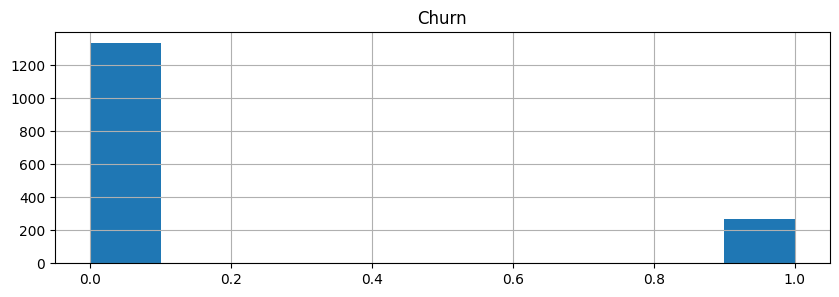

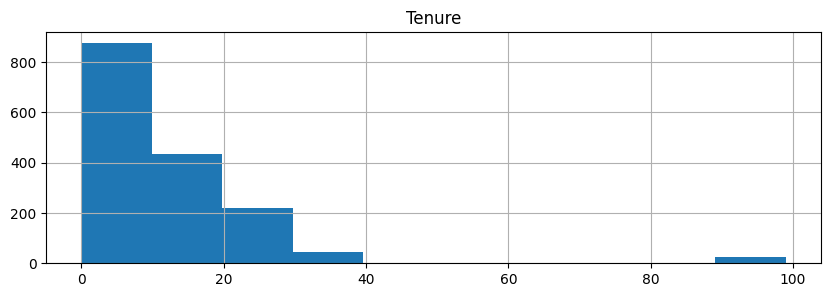

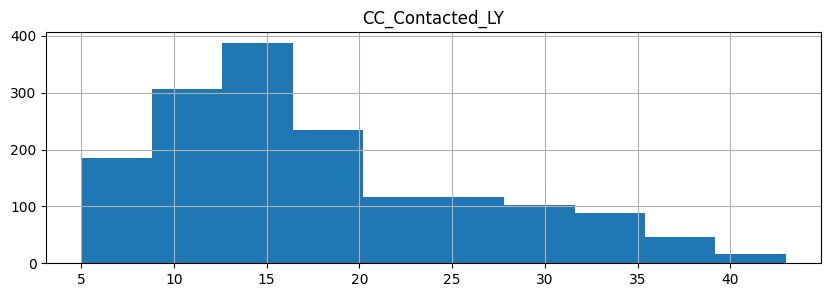

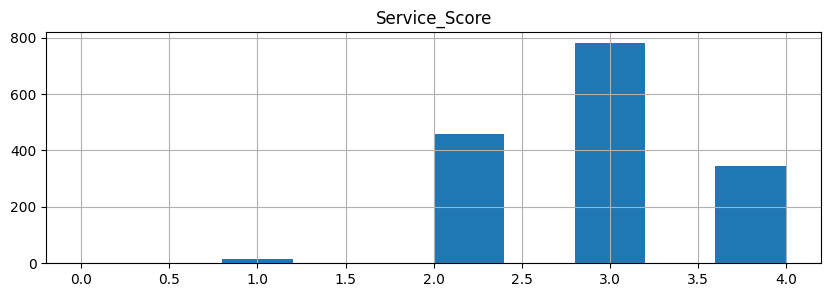

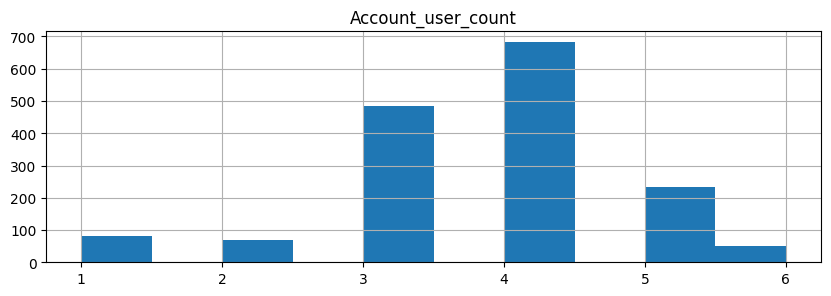

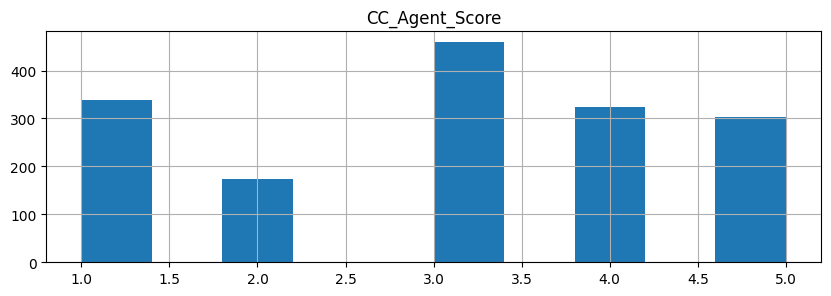

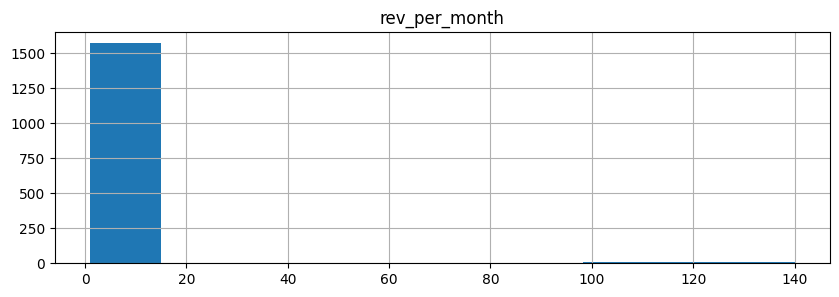

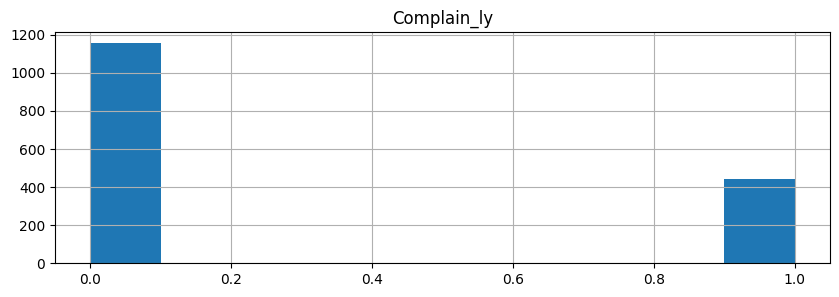

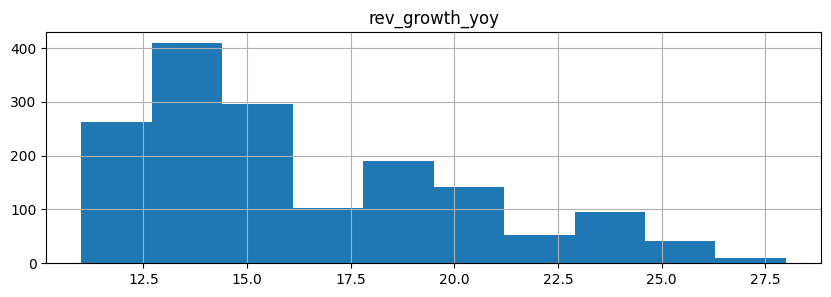

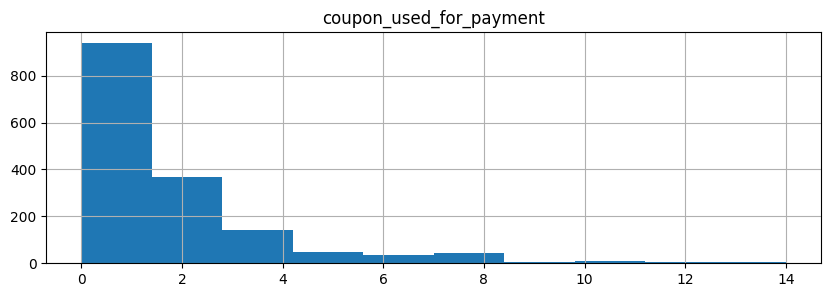

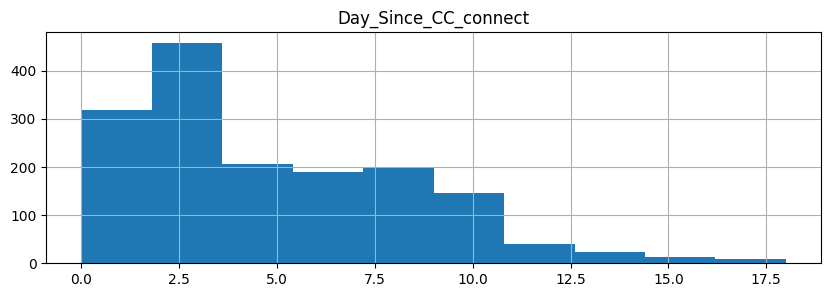

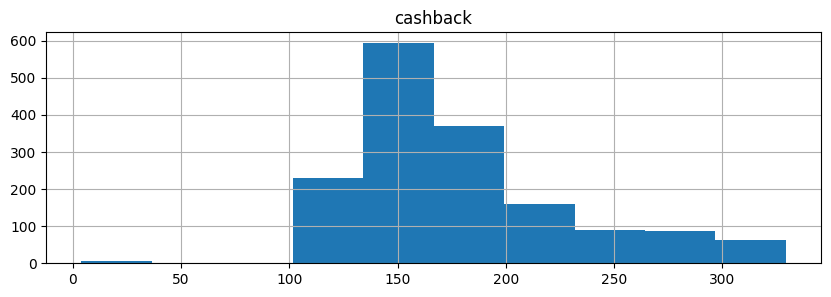

In [46]:
for col in num_cols:
  customers[col].hist(figsize=(10,3) )
  plt.title(col)
  plt.show()

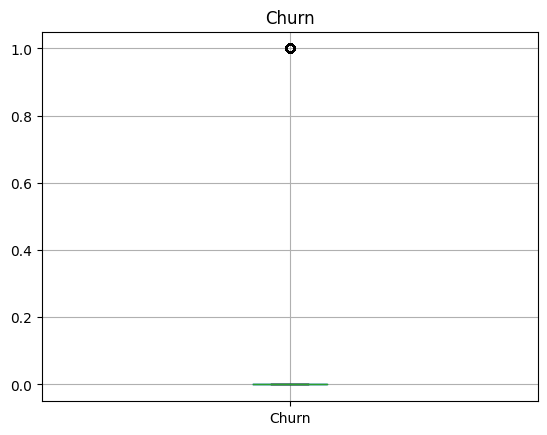

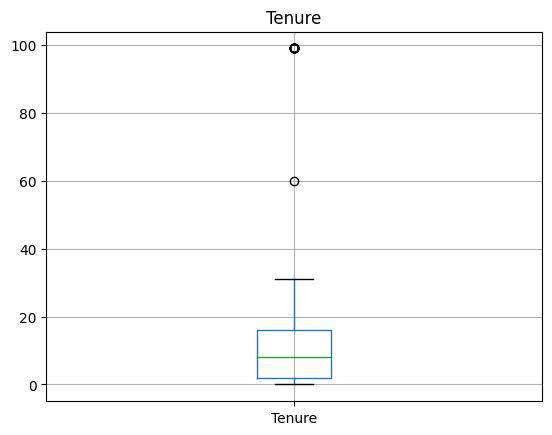

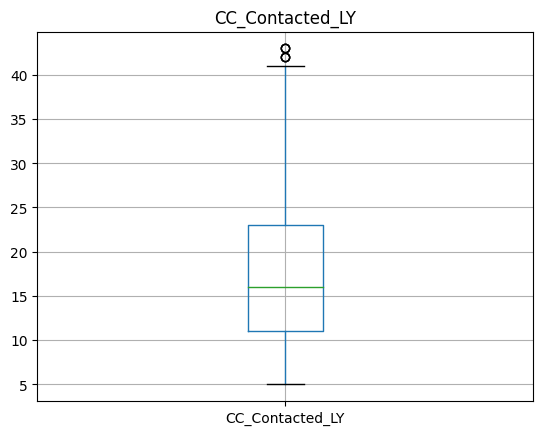

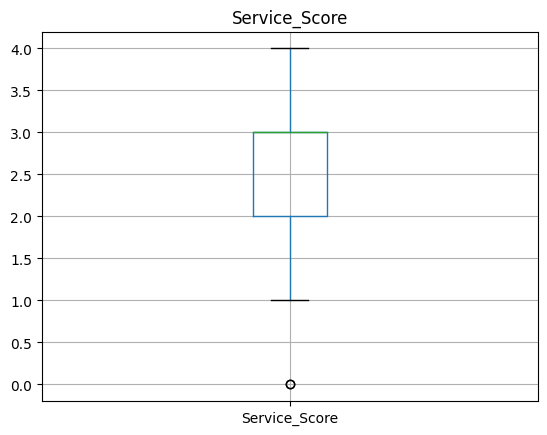

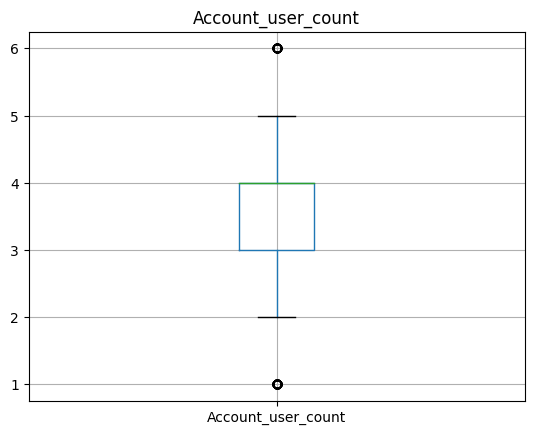

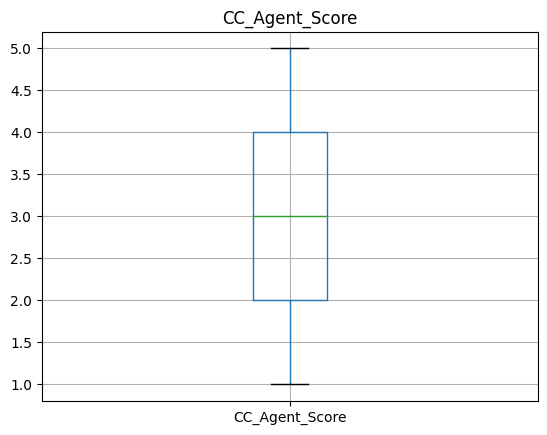

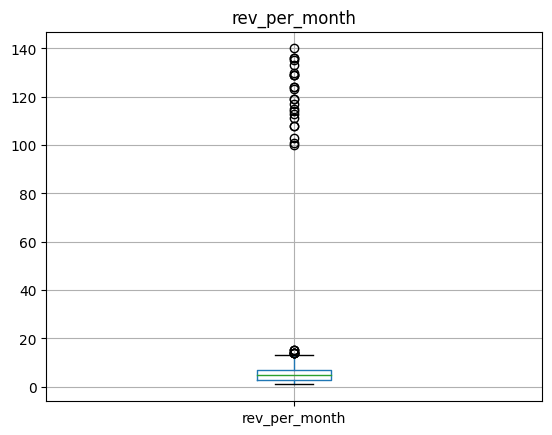

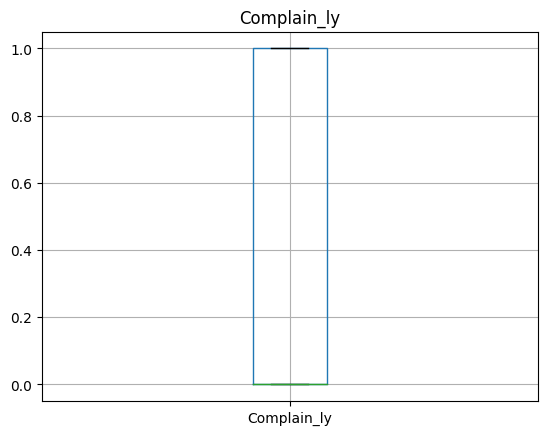

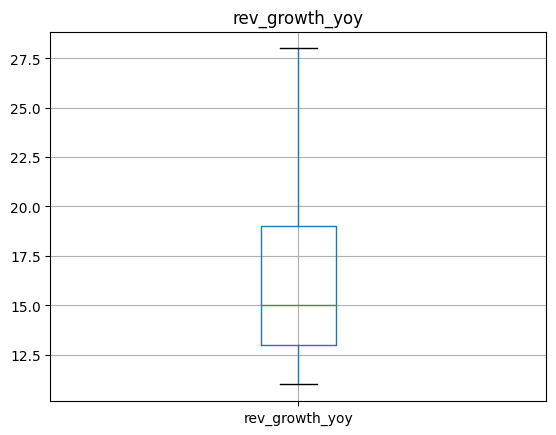

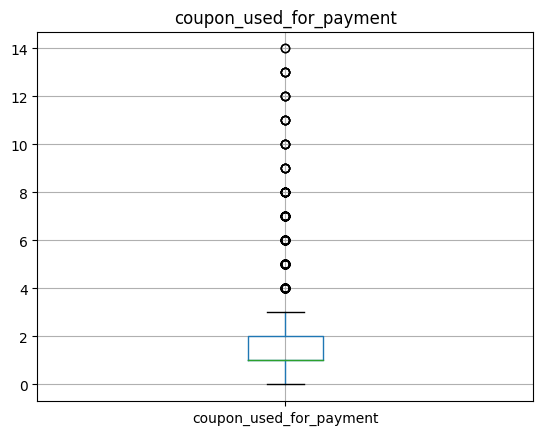

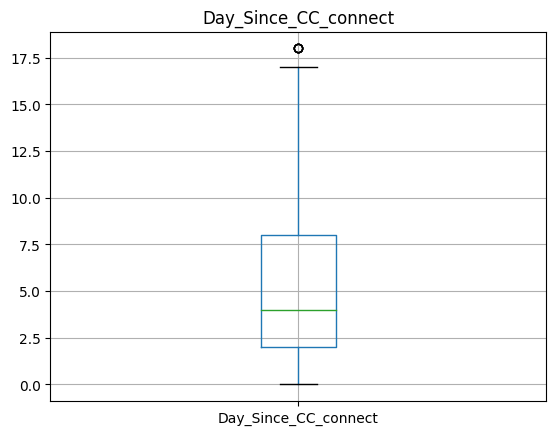

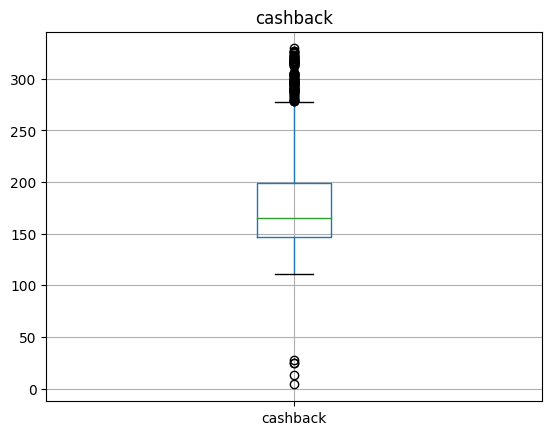

In [47]:
for col in num_cols:
  customers.boxplot(column=[col])
  plt.title(col)
  plt.show()

In [48]:
corr = customers[num_cols].corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=2)

,Churn,Tenure,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback
Churn,1.00,-0.22,0.13,0.01,0.03,0.13,0.02,0.25,-0.01,0.01,-0.16,-0.17
Tenure,-0.22,1.00,-0.03,0.04,-0.00,-0.02,0.02,-0.02,0.06,0.09,0.12,0.31
CC_Contacted_LY,0.13,-0.03,1.00,0.04,0.03,-0.02,0.01,0.06,0.09,0.02,-0.01,-0.05
Service_Score,0.01,0.04,0.04,1.00,0.32,0.05,0.03,0.02,0.12,0.20,0.10,0.16
Account_user_count,0.03,-0.00,0.03,0.32,1.00,0.02,0.01,-0.03,0.05,0.16,0.05,0.14
CC_Agent_Score,0.13,-0.02,-0.02,0.05,0.02,1.00,0.01,0.01,-0.07,0.03,0.02,-0.05
rev_per_month,0.02,0.02,0.01,0.03,0.01,0.01,1.00,-0.02,-0.01,0.06,-0.01,0.06
Complain_ly,0.25,-0.02,0.06,0.02,-0.03,0.01,-0.02,1.00,0.01,0.01,-0.06,-0.01
rev_growth_yoy,-0.01,0.06,0.09,0.12,0.05,-0.07,-0.01,0.01,1.00,0.00,0.04,0.02
coupon_used_for_payment,0.01,0.09,0.02,0.20,0.16,0.03,0.06,0.01,0.00,1.00,0.33,0.22


In [50]:
for col in num_cols:
    mean = customers[col].mean()
    std = customers[col].std()
    threshold = 3
    print('outlier in',col,'is\n', customers[(customers[col] - mean)/std > threshold][col].describe())

outlier in Churn is
 count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Churn, dtype: float64
outlier in Tenure is
 count    25.00
mean     97.44
std       7.80
min      60.00
25%      99.00
50%      99.00
75%      99.00
max      99.00
Name: Tenure, dtype: float64
outlier in CC_Contacted_LY is
 count     3.0
mean     43.0
std       0.0
min      43.0
25%      43.0
50%      43.0
75%      43.0
max      43.0
Name: CC_Contacted_LY, dtype: float64
outlier in Service_Score is
 count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Service_Score, dtype: float64
outlier in Account_user_count is
 count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Account_user_count, dtype: float64
outlier in CC_Agent_Score is
 count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: CC_Agen

In [58]:
def bar_plot(df, feature, target='Marital_Status'):
    temp_df = pd.DataFrame(df.groupby(feature).agg(
        Single=(target, lambda x: sum((x == 1) & (df[feature] == 'Single'))),
        Married=(target, lambda x: sum((x == 1) & (df[feature] == 'Married'))),
        Divorced=(target, lambda x: sum((x == 1) & (df[feature] == 'Divorced')))
    ))

    temp_df = temp_df.reset_index()

    X_axis = np.arange(len(temp_df[feature]))

    plt.figure(figsize=(10, 2))
    plt.bar(X_axis - 0.2, temp_df['Single'], 0.4, label='Single')
    plt.bar(X_axis + 0.0, temp_df['Married'], 0.4, label='Married')
    plt.bar(X_axis + 0.2, temp_df['Divorced'], 0.4, label='Divorced')

    plt.xticks(X_axis, temp_df[feature])
    plt.xlabel(feature)
    plt.ylabel("Number of " + target)
    plt.title("Number of " + target + " by " + feature)
    plt.legend()
    plt.show()



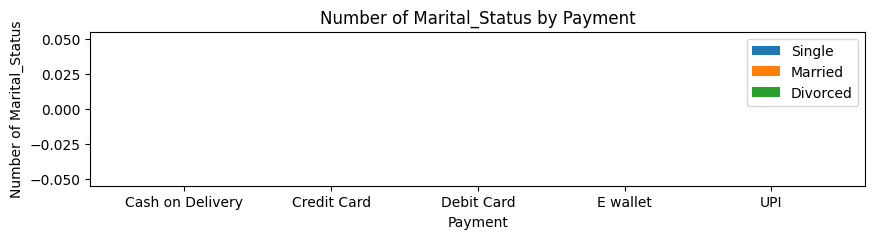

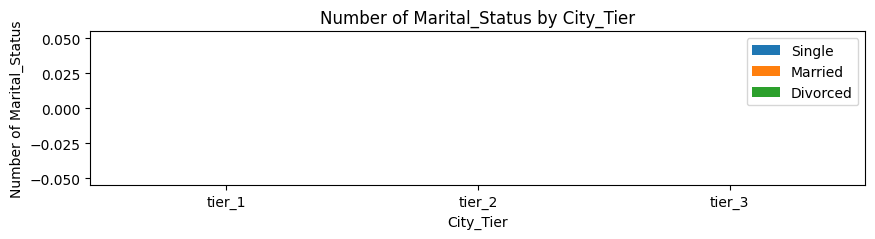

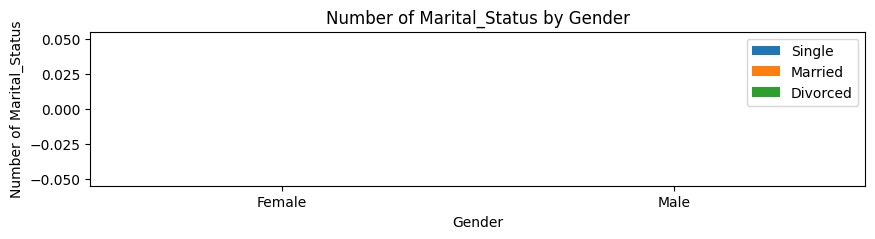

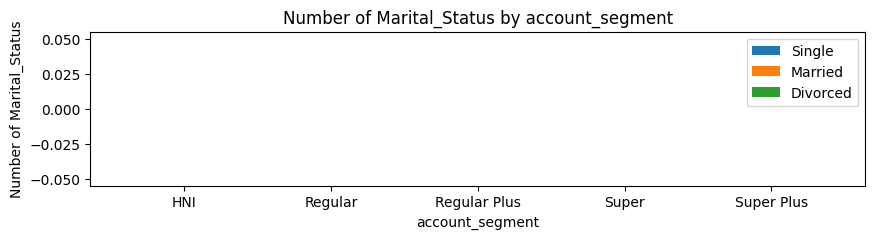

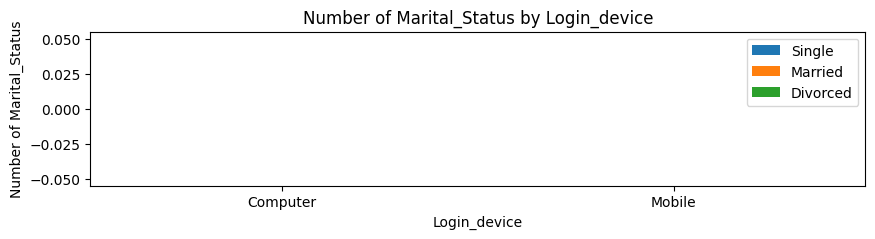

In [59]:
for col in cat_cols:
    bar_plot(customers, col)